In [286]:

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [287]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

In [288]:
data=pd.read_csv("Data_base.csv",header=0,sep=',')
print(data.shape)
data.head()
############# Where we need to predict EUR_o..Mstb. ###############################
############ The target for our models will to predict the (EUR) (estimated ultimate recovery) which is a production metric.

(1359, 22)


,WellID,Subarea,Operator,County,Completion.Date,Completion.Year,Surface.Latitude,Surface.Longitude,Depth.Total.Driller..ft.,WB.Spacing.Proxy,...,Between_Zone,Frac.Stages,Treatment.Records,Fluid.Water..Gals.,Acid..Gals.,Gel.x.link..Gals.,Other..Gals.,Proppant...Total..lbs.,Fluid...Total..lbs.,EUR_o..Mstb.
0,2,E,PIONEER NATURAL RESOURCES USA INC,GLASSCOCK,37698,2003,31.65753,-101.72135,8550,160,...,SPBR_U --> WFMP,3.0,6,0.0,3500.0,187446.0,0.0,471330.0,190946.0,40.200000
1,3,D,PIONEER NATURAL RESOURCES USA INC,GLASSCOCK,37698,2003,31.71566,-101.71787,8550,40,...,CLFK --> WFMP,3.0,8,0.0,5000.0,201390.0,0.0,476570.0,206390.0,39.050383
2,5,D,ENDEAVOR ENERGY RESOURCES LIMITED PRTS,GLASSCOCK,38022,2004,31.95401,-101.74911,10500,20,...,CLFK --> WFMP,1.0,1,334900.0,0.0,0.0,0.0,553020.0,334900.0,51.856000
3,7,F,ENDEAVOR ENERGY RESOURCES LIMITED PRTS,GLASSCOCK,37714,2003,31.70024,-101.52357,8900,80,...,CLFK --> WFMP,1.0,1,247212.0,0.0,0.0,0.0,265000.0,247212.0,22.156000
4,10,E,PIONEER NATURAL RESOURCES USA INC,GLASSCOCK,37733,2003,31.69134,-101.72307,8575,Over 160,...,SPBR_U --> WFMP,3.0,8,0.0,5000.0,196636.0,0.0,318180.0,201636.0,45.276000


In [289]:
# Check if the data set contains any null values 
data[data.isnull().any(axis=1)].count()

WellID                      154
Subarea                     154
Operator                    154
County                      154
Completion.Date             154
Completion.Year             154
Surface.Latitude            154
Surface.Longitude           154
Depth.Total.Driller..ft.    154
WB.Spacing.Proxy             91
SPBY.Spacing.Proxy           91
Deepest_Zone                154
Between_Zone                154
Frac.Stages                 139
Treatment.Records           154
Fluid.Water..Gals.           62
Acid..Gals.                  62
Gel.x.link..Gals.            62
Other..Gals.                 62
Proppant...Total..lbs.       63
Fluid...Total..lbs.          62
EUR_o..Mstb.                154
dtype: int64

In [290]:
#Here the count of missing values is less than 10% so we are going to remove the missing values
# drop rows with missing values
data.dropna(inplace=True)
#original_data=data

In [291]:
#from sklearn.impute import SimpleImputer
#my_imputer = SimpleImputer()
#data= my_imputer.fit_transform(original_data)

In [292]:
# Check if the data set contains any null values - Nothing found!
data[data.isnull().any(axis=1)].count()

WellID                      0
Subarea                     0
Operator                    0
County                      0
Completion.Date             0
Completion.Year             0
Surface.Latitude            0
Surface.Longitude           0
Depth.Total.Driller..ft.    0
WB.Spacing.Proxy            0
SPBY.Spacing.Proxy          0
Deepest_Zone                0
Between_Zone                0
Frac.Stages                 0
Treatment.Records           0
Fluid.Water..Gals.          0
Acid..Gals.                 0
Gel.x.link..Gals.           0
Other..Gals.                0
Proppant...Total..lbs.      0
Fluid...Total..lbs.         0
EUR_o..Mstb.                0
dtype: int64

In [293]:
data.describe()

,WellID,Completion.Date,Completion.Year,Surface.Latitude,Surface.Longitude,Depth.Total.Driller..ft.,Frac.Stages,Treatment.Records,Fluid.Water..Gals.,Acid..Gals.,Gel.x.link..Gals.,Other..Gals.,Proppant...Total..lbs.,Fluid...Total..lbs.,EUR_o..Mstb.
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1.205000e+03,1.205000e+03,1.205000e+03,1.205000e+03,1.205000e+03,1.205000e+03,1205.000000
mean,1096.275519,39346.631535,2007.234025,31.704590,-101.819802,9800.726971,3.326971,5.942739,1.939380e+05,2.013510e+04,3.679256e+05,8.314915e+03,2.386335e+06,5.903136e+05,42.534668
std,620.948986,1104.648529,3.016566,0.144113,0.211153,1086.747443,2.293855,4.632782,1.229838e+06,2.922413e+05,4.553151e+05,1.109265e+05,6.320150e+07,1.291072e+06,27.204339
min,2.000000,37625.000000,2003.000000,31.397080,-102.243200,8000.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.675000e+04,1.008000e+03,0.248000
25%,579.000000,38377.000000,2005.000000,31.584150,-102.004640,8530.000000,1.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.913100e+05,2.737560e+05,25.660000
50%,1125.000000,39159.000000,2007.000000,31.724850,-101.768660,10175.000000,3.000000,6.000000,0.000000e+00,5.500000e+03,2.215250e+05,0.000000e+00,4.751200e+05,3.887500e+05,36.584000
75%,1634.000000,40511.000000,2010.000000,31.814960,-101.645690,10580.000000,4.000000,8.000000,2.920000e+05,1.249200e+04,4.872350e+05,0.000000e+00,7.498600e+05,7.061620e+05,51.593164
max,2249.000000,41148.000000,2012.000000,31.999800,-101.392310,12510.000000,15.000000,24.000000,4.166337e+07,9.999990e+06,6.053124e+06,2.356200e+06,2.194438e+09,4.166337e+07,231.404000


In [294]:
data.corr()

,WellID,Completion.Date,Completion.Year,Surface.Latitude,Surface.Longitude,Depth.Total.Driller..ft.,Frac.Stages,Treatment.Records,Fluid.Water..Gals.,Acid..Gals.,Gel.x.link..Gals.,Other..Gals.,Proppant...Total..lbs.,Fluid...Total..lbs.,EUR_o..Mstb.
WellID,1.000000,0.004840,0.010782,-0.640017,0.144856,-0.492333,-0.256292,-0.310473,-0.043147,-0.048164,-0.036069,-0.048223,-0.043223,-0.068867,-0.079688
Completion.Date,0.004840,1.000000,0.995614,0.360812,0.029001,0.413350,0.217432,0.176868,0.043850,0.054170,0.487965,0.092509,0.034492,0.234068,0.246182
Completion.Year,0.010782,0.995614,1.000000,0.354390,0.033864,0.406045,0.208470,0.167904,0.047169,0.051729,0.489144,0.092841,0.030343,0.237121,0.248976
Surface.Latitude,-0.640017,0.360812,0.354390,1.000000,-0.468646,0.725550,0.189563,0.244296,-0.000949,0.063268,0.356542,0.014686,-0.000077,0.140418,0.330793
Surface.Longitude,0.144856,0.029001,0.033864,-0.468646,1.000000,-0.625976,0.016115,-0.021947,0.048477,0.001899,-0.168517,0.087468,0.040479,-0.005308,-0.248698
Depth.Total.Driller..ft.,-0.492333,0.413350,0.406045,0.725550,-0.625976,1.000000,0.218885,0.228044,0.016273,0.030311,0.380810,0.017010,0.024161,0.158122,0.350265
Frac.Stages,-0.256292,0.217432,0.208470,0.189563,0.016115,0.218885,1.000000,0.932296,-0.111650,-0.009017,0.261877,0.013915,-0.028318,-0.014845,-0.113564
Treatment.Records,-0.310473,0.176868,0.167904,0.244296,-0.021947,0.228044,0.932296,1.000000,-0.124709,0.002054,0.281824,0.009796,-0.023435,-0.018099,-0.081443
Fluid.Water..Gals.,-0.043147,0.043850,0.047169,-0.000949,0.048477,0.016273,-0.111650,-0.124709,1.000000,-0.008963,-0.122228,-0.011830,-0.004408,0.906420,0.015316
Acid..Gals.,-0.048164,0.054170,0.051729,0.063268,0.001899,0.030311,-0.009017,0.002054,-0.008963,1.000000,0.005186,-0.001125,-0.000473,0.219550,0.009316


In [295]:
data['Subarea'].unique()

array(['E', 'D', 'F', 'C', 'A', 'B'], dtype=object)

In [296]:
data['Operator'].unique()

array(['PIONEER NATURAL RESOURCES USA INC',
       'ENDEAVOR ENERGY RESOURCES LIMITED PRTS', 'APACHE CORPORATION',
       'ENERGEN RESOURCES CORPORATION', 'ATHLON FE OPERATING LLC',
       'MERIT ENERGY COMPANY', 'BERRY OIL COMPANY',
       'CROWNQUEST OPERATING LLC', 'LAREDO PETROLEUM INCORPORATED',
       'PARSLEY ENERGY OPERATIONS LLC',
       'ROYALTY LAND & DEVELOPMENT COMPANY INC',
       'BLUESTEM ENERGY HOLDINGS LLC', 'ATHLON ENERGY OPERATING LLC',
       'PIEDRA OPERATING LLC', 'THREE RIVERS OPERATING COMPANY II LLC',
       'DISCOVERY OPERATING INCORPORATED', 'MIDLAND ENERGY INCORPORATED',
       'LEGACY RESERVES OPERATING LP',
       'JM COX RESOURCES LIMITED PARTNERSHIP',
       'CHEVRON U S A INCORPORATED',
       'COG OPERATING LIMITED LIABILITY CORP', 'PROBITY OPERATING LLC',
       'SUMMIT PETROLEUM LIMITED LIABILITY CORP',
       'MIDENERGY OPERATING LLC', 'TRILOGY OPERATING INCORPORATED',
       'PRIME OPERATING COMPANY', 'BTA OIL PRODUCERS LLC',
       '3-M ENERGY CO

In [297]:
 data['County'].unique()

array(['GLASSCOCK', 'MIDLAND', 'REAGAN'], dtype=object)

In [298]:
 data['WB.Spacing.Proxy'].unique()

array(['160', '40', '20', '80', 'Over 160', 'Sub 20'], dtype=object)

In [299]:
data['SPBY.Spacing.Proxy'].unique()

array(['40', '80', '20', 'Over 160', '160', 'Sub 20'], dtype=object)

In [300]:
data['Deepest_Zone'].unique()

array(['WFMP', 'ATOKA', 'STRAWN', 'SPBR_L', 'WOOD', 'SIL_DEV', 'MISS',
       'FUSS', '#VALUE!'], dtype=object)

In [301]:
data['Between_Zone'].unique()

array(['SPBR_U --> WFMP', 'CLFK --> WFMP', 'SPBR_L --> WFMP',
       'SPBR_U --> ATOKA', 'WFMP --> WFMP', 'CLFK --> ATOKA',
       'CLFK --> STRAWN', 'SPBR_U --> SPBR_L', 'CLFK --> SPBR_L',
       'WFMP --> ATOKA', 'SPBR_U --> STRAWN', 'SPBR_L --> STRAWN',
       'SPBR_L --> ATOKA', 'WFMP --> WOOD', 'CLFK --> SIL_DEV',
       'WFMP --> STRAWN', 'WFMP --> SIL_DEV', 'SPBR_U --> SIL_DEV',
       'SPBR_L --> MISS', 'WFMP --> MISS', 'SPBR_L --> SIL_DEV',
       'SPBR_L --> FUSS', 'SPBR_L --> WOOD', '#VALUE!', 'WFMP --> FUSS',
       'SPBR_U --> MISS'], dtype=object)

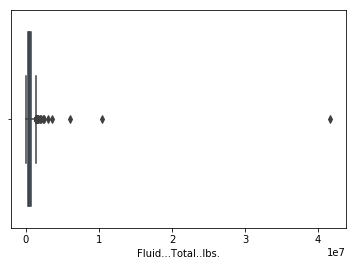

In [302]:
# Boxplot for 'age'
g = sns.boxplot(x=data["Fluid...Total..lbs."])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


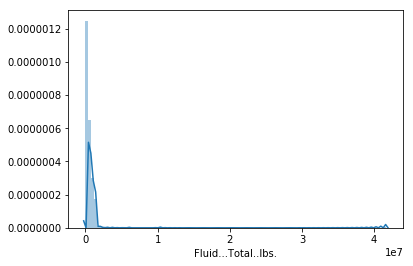

In [303]:
# Distribution of Age
sns.distplot(data["Fluid...Total..lbs."], bins=100)

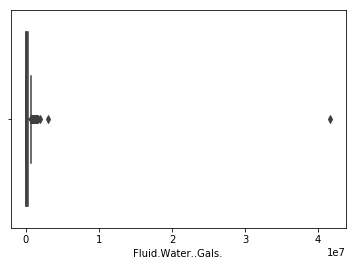

In [304]:
# Boxplot for 'age'
g = sns.boxplot(x=data["Fluid.Water..Gals."])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


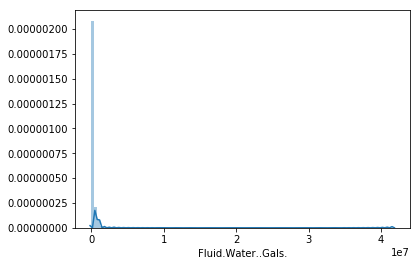

In [305]:
# Distribution of Age
sns.distplot(data["Fluid.Water..Gals."], bins=100)

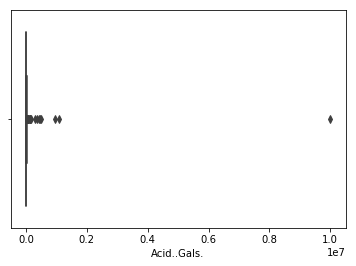

In [306]:
# Boxplot for 'age'
g = sns.boxplot(x=data["Acid..Gals."])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


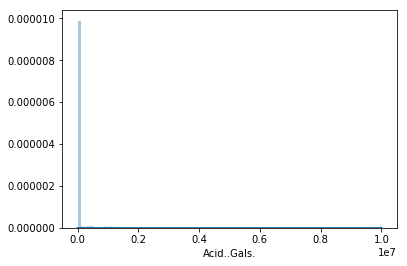

In [307]:
# Distribution of Age
sns.distplot(data["Acid..Gals."], bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffabcb64a20>,
      dtype=object)

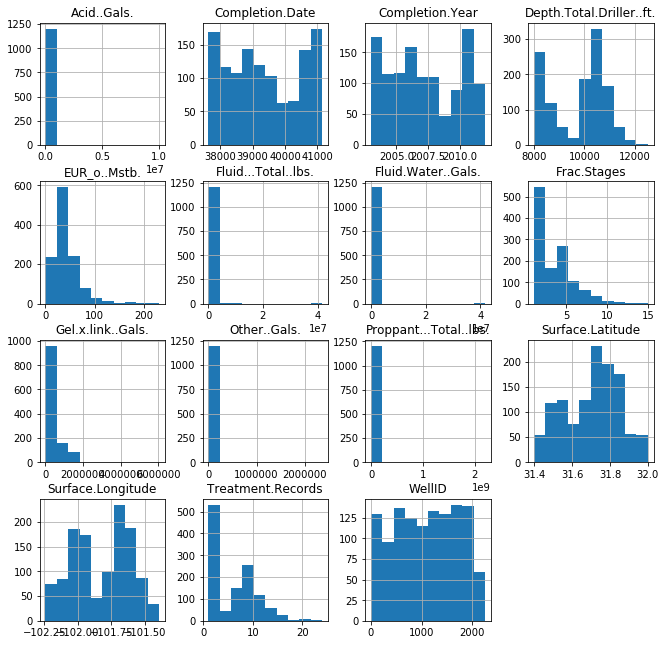

In [308]:
import matplotlib.pyplot as plt
data[data.dtypes[(data.dtypes=="float64")|(data.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [309]:
##########################   SCALLING all THE Data ######################################
cont_cols=["Fluid...Total..lbs.","Completion.Date","Depth.Total.Driller..ft.","Frac.Stages","Treatment.Records",
 "Fluid.Water..Gals.", "Acid..Gals." , "Gel.x.link..Gals.", "Other..Gals.", "Proppant...Total..lbs."
]

from sklearn.preprocessing import RobustScaler
robust=RobustScaler()
data_rob=robust.fit_transform(data[["Fluid...Total..lbs.","Completion.Date","Depth.Total.Driller..ft.","Frac.Stages","Treatment.Records",
 "Fluid.Water..Gals.", "Acid..Gals." , "Gel.x.link..Gals.", "Other..Gals.", "Proppant...Total..lbs."]])


import pandas as pd
data_rob=pd.DataFrame(data_rob)
data_rob.columns =cont_cols
#data_minmax.dropna(inplace=True)
data_rob.shape

(1205, 10)

In [310]:
#Create dummy variables
data1=data
cat_vars=['Subarea','Operator','County','WB.Spacing.Proxy','SPBY.Spacing.Proxy','Deepest_Zone','Between_Zone','Fluid...Total..lbs.','Completion.Year']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data1.join(cat_list)
cat_vars=['Subarea','Operator','County','WB.Spacing.Proxy','SPBY.Spacing.Proxy','Deepest_Zone','Between_Zone','Fluid...Total..lbs.','Completion.Year']
data_vars=data1.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [311]:
data_final=data1[to_keep]
#data_final=data_final.drop(["Fluid...Total..lbs.","Completion.Date","Depth.Total.Driller..ft.","Frac.Stages","Treatment.Records",
#"Fluid.Water..Gals.", "Acid..Gals." , "Gel.x.link..Gals.", "Other..Gals.", "Proppant...Total..lbs."], inplace=True)
data_final=pd.DataFrame(data_final)
data_final.shape

(1205, 1177)

In [313]:
frames = [data_final,data_rob]
data_final = pd.concat(frames,sort=False,axis=1)
data_final.shape
data_final.dropna(inplace=True)

In [270]:
# The Correltion matrix
corr = data_final.corr()
corr

,Acid..Gals.,Between_Zone_#VALUE!,Between_Zone_CLFK --> ATOKA,Between_Zone_CLFK --> SIL_DEV,Between_Zone_CLFK --> SPBR_L,Between_Zone_CLFK --> STRAWN,Between_Zone_CLFK --> WFMP,Between_Zone_SPBR_L --> ATOKA,Between_Zone_SPBR_L --> FUSS,Between_Zone_SPBR_L --> MISS,...,Surface.Latitude,Surface.Longitude,Treatment.Records,WB.Spacing.Proxy_160,WB.Spacing.Proxy_20,WB.Spacing.Proxy_40,WB.Spacing.Proxy_80,WB.Spacing.Proxy_Over 160,WB.Spacing.Proxy_Sub 20,WellID
Acid..Gals.,1.000000,-0.001976,-0.002892,0.003663,-0.006632,-0.001837,-0.020580,-0.004606,0.001240,-0.003561,...,0.063268,0.001899,0.034001,-0.004836,-0.012296,0.023790,-0.014144,-0.005992,-0.001091,-0.048164
Between_Zone_#VALUE!,-0.001976,1.000000,-0.006249,-0.004718,-0.010067,-0.008538,-0.030473,-0.019040,-0.002356,-0.005783,...,0.093603,0.083090,-0.012229,-0.000281,-0.016651,0.008526,0.003385,-0.014346,-0.002356,-0.093057
Between_Zone_CLFK --> ATOKA,-0.002892,-0.006249,1.000000,-0.004411,-0.009413,-0.007983,-0.028493,-0.017803,-0.002203,-0.005407,...,0.052200,-0.025883,-0.024994,0.036739,-0.015569,0.018952,-0.033915,-0.013414,-0.002203,-0.033496
Between_Zone_CLFK --> SIL_DEV,0.003663,-0.004718,-0.004411,1.000000,-0.007107,-0.006027,-0.021512,-0.013441,-0.001663,-0.004082,...,0.016107,0.056688,0.100412,-0.021926,-0.011755,-0.052005,0.077758,-0.010128,-0.001663,-0.085078
Between_Zone_CLFK --> SPBR_L,-0.006632,-0.010067,-0.009413,-0.007107,1.000000,-0.012860,-0.045901,-0.028680,-0.003549,-0.008711,...,-0.103967,0.095803,-0.008819,-0.026180,0.044881,-0.042184,0.051558,-0.021610,-0.003549,0.107620
Between_Zone_CLFK --> STRAWN,-0.001837,-0.008538,-0.007983,-0.006027,-0.012860,1.000000,-0.038927,-0.024322,-0.003010,-0.007388,...,0.144598,0.043631,0.027312,0.008715,-0.021271,-0.029492,0.006422,0.076047,-0.003010,-0.074090
Between_Zone_CLFK --> WFMP,-0.020580,-0.030473,-0.028493,-0.021512,-0.045901,-0.038927,1.000000,-0.086814,-0.010742,-0.026368,...,-0.170636,0.175625,-0.089025,0.026405,0.040770,0.005734,-0.059409,0.053744,-0.010742,0.062711
Between_Zone_SPBR_L --> ATOKA,-0.004606,-0.019040,-0.017803,-0.013441,-0.028680,-0.024322,-0.086814,1.000000,-0.006712,-0.016476,...,0.122969,0.018815,0.074264,0.035971,-0.028230,0.024291,-0.031567,-0.018806,-0.006712,-0.067578
Between_Zone_SPBR_L --> FUSS,0.001240,-0.002356,-0.002203,-0.001663,-0.003549,-0.003010,-0.010742,-0.006712,1.000000,-0.002039,...,0.003375,0.048559,0.056367,0.075854,-0.005870,-0.025970,-0.021389,-0.005057,-0.000831,-0.038412
Between_Zone_SPBR_L --> MISS,-0.003561,-0.005783,-0.005407,-0.004082,-0.008711,-0.007388,-0.026368,-0.016476,-0.002039,1.000000,...,0.058055,0.065250,-0.052591,-0.026877,-0.014409,-0.040038,0.070678,-0.012414,-0.002039,-0.088510


In [315]:
# Extract the deposte_cat column (the dependent variable)
corr_deposite = pd.DataFrame(corr['EUR_o..Mstb.'].drop('EUR_o..Mstb.'))
corr_deposite.sort_values(by = 'EUR_o..Mstb.', ascending = False)

,EUR_o..Mstb.
Depth.Total.Driller..ft.,0.350265
Surface.Latitude,0.330793
Completion.Year_2012,0.296239
County_MIDLAND,0.257625
Completion.Date,0.246182
Gel.x.link..Gals.,0.239730
Between_Zone_SPBR_U --> ATOKA,0.215482
Operator_COG OPERATING LIMITED LIABILITY CORP,0.203884
Deepest_Zone_ATOKA,0.202461
Fluid...Total..lbs._808500.0,0.200166


In [316]:
data_final=pd.DataFrame(data_final)
y=data_final[['EUR_o..Mstb.']]
data_final1=data_final.drop(['EUR_o..Mstb.'],axis=1)
x=data_final1

x.head()

,WellID,Completion.Date,Surface.Latitude,Surface.Longitude,Depth.Total.Driller..ft.,Frac.Stages,Treatment.Records,Fluid.Water..Gals.,Acid..Gals.,Gel.x.link..Gals.,...,Fluid...Total..lbs.,Completion.Date,Depth.Total.Driller..ft.,Frac.Stages,Treatment.Records,Fluid.Water..Gals.,Acid..Gals.,Gel.x.link..Gals.,Other..Gals.,Proppant...Total..lbs.
0,2.0,37698.0,31.65753,-101.72135,8550.0,3.0,6.0,0.0,3500.0,187446.0,...,-0.457450,-0.684630,-0.792683,0.000000,0.000000,0.000000,-0.160102,-0.069944,0.0,-0.008265
1,3.0,37698.0,31.71566,-101.71787,8550.0,3.0,8.0,0.0,5000.0,201390.0,...,-0.421733,-0.684630,-0.792683,0.000000,0.333333,0.000000,-0.040026,-0.041325,0.0,0.003162
2,5.0,38022.0,31.95401,-101.74911,10500.0,1.0,1.0,334900.0,0.0,0.0,...,-0.124536,-0.532802,0.158537,-0.666667,-0.833333,1.146918,-0.440282,-0.454657,0.0,0.169883
3,7.0,37714.0,31.70024,-101.52357,8900.0,1.0,1.0,247212.0,0.0,0.0,...,-0.327327,-0.677132,-0.621951,-0.666667,-0.833333,0.846616,-0.440282,-0.454657,0.0,-0.458227
4,10.0,37733.0,31.69134,-101.72307,8575.0,3.0,8.0,0.0,5000.0,196636.0,...,-0.432728,-0.668229,-0.780488,0.000000,0.333333,0.000000,-0.040026,-0.051082,0.0,-0.342253


In [348]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [349]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [350]:
########################################################Model Using Decission Tree ############################
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_train_ds = model.predict(X_train)  
#print(model.score(X_train, y_train))
y_pred_ds = model.predict(X_test)  

In [351]:
#################################################Getting the R square and adj R square ######################
from sklearn.metrics import r2_score
R2=r2_score(y_train, y_pred_train_ds)
n=X_train.shape[0]
p=X_train.shape[1]
print("R square",R2)
r2adj = 1-(1-R2)*(n-1)/(n-p-1)
print("Adj R sqr",r2adj)

#################################################Looks like a case of overfitting #############################

R square 1.0
Adj R sqr 1.0


In [352]:
from sklearn import metrics
print("Train")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_ds))  

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_ds)))  

print("Test")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ds))  

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ds))) 

########### Decission Tree clearly looks like overfitting ###################################

Train
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0
Test
Mean Absolute Error: 17.557624715141593
Root Mean Squared Error: 26.734188485251345


In [353]:
#####################Model Using Random Forest ###########################################

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)
y_pred_train = regressor.predict(X_train)  
y_pred = regressor.predict(X_test)  

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [354]:
from sklearn import metrics
print("Train")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))  

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))  

print("Test")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Train
Mean Absolute Error: 6.250524964407436
Root Mean Squared Error: 9.978627461570964
Test
Mean Absolute Error: 12.098636185795131
Root Mean Squared Error: 16.436686880020176


In [39]:
# from sklearn.decomposition import PCA

# pca = PCA()  
# X_train_pca = pca.fit_transform(X_train)  
# X_test = pca.transform(X_test) 

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[0.08864895 0.07564561 0.06402156 0.02425647 0.02817795 0.03048827
 0.02381867 0.0435576  0.06790452 0.0419233  0.03104372 0.05866826
 0.03425977 0.03061955 0.08341376 0.02193792 0.03097545 0.02672955
 0.02642816 0.02037883 0.01986443 0.06090268 0.0324566  0.03387844]
<class 'pandas.core.series.Series'>


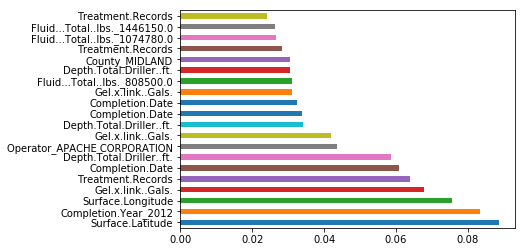

In [355]:
################################## Feature Importance #######################################################


from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
print (type(feat_importances))

feat_importances.nlargest(20).plot(kind='barh') #barh = horizontal bar chart
plt.show()

In [362]:
print(feat_importances.nlargest(20))

Surface.Latitude                 0.088649
Completion.Year_2012             0.083414
Surface.Longitude                0.075646
Gel.x.link..Gals.                0.067905
Treatment.Records                0.064022
Completion.Date                  0.060903
Depth.Total.Driller..ft.         0.058668
Operator_APACHE CORPORATION      0.043558
Gel.x.link..Gals.                0.041923
Depth.Total.Driller..ft.         0.034260
Completion.Date                  0.033878
Completion.Date                  0.032457
Gel.x.link..Gals.                0.031044
Fluid...Total..lbs._808500.0     0.030975
Depth.Total.Driller..ft.         0.030620
County_MIDLAND                   0.030488
Treatment.Records                0.028178
Fluid...Total..lbs._1074780.0    0.026730
Fluid...Total..lbs._1446150.0    0.026428
Treatment.Records                0.024256
dtype: float64


In [327]:
cols=["Surface.Latitude","Completion.Date","Depth.Total.Driller..ft.","Fluid...Total..lbs._808500.0","Completion.Year_2012","Fluid...Total..lbs._1074780.0",
     "Operator_SUMMIT PETROLEUM LIMITED LIABILITY CORP","Surface.Longitude","Fluid...Total..lbs._1446150.0","Fluid...Total..lbs._735000.0","Fluid...Total..lbs._1231488.0"]

In [360]:
data_final=pd.DataFrame(data_final)
y=data_final[['EUR_o..Mstb.']]
data_final1=data_final.drop(['EUR_o..Mstb.'],axis=1)
x=data_final1[["Surface.Latitude","Surface.Longitude","Treatment.Records","County_MIDLAND",
"Fluid...Total..lbs._22512.0",
"Operator_APACHE CORPORATION",
"Gel.x.link..Gals.",
"Depth.Total.Driller..ft.",
"Completion.Year_2012",
"Operator_SUMMIT PETROLEUM LIMITED LIABILITY CORP",
"Fluid...Total..lbs._808500.0",
"Completion.Date"]]



In [361]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(901, 20)
(226, 20)
(901, 1)
(226, 1)


In [363]:
########################################################Model Using Decission Tree ############################
from sklearn import tree
model1 = tree.DecisionTreeRegressor()
model1.fit(X_train, y_train)
y_pred_train_ds1 = model1.predict(X_train)  
#print(model.score(X_train, y_train))
y_pred_ds1 = model1.predict(X_test)  

In [364]:
from sklearn.metrics import r2_score
R2=r2_score(y_train, y_pred_train)
n=X_train.shape[0]
p=X_train.shape[1]
R2

0.8825849106659269

In [365]:
r2adj = 1-(1-R2)*(n-1)/(n-p-1)
r2adj

0.8799163859083343

In [366]:
######################## Model Metrices ########################################################################
from sklearn import metrics

print("Train")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_ds1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_ds1)))  


print("Test")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ds1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ds1))) 


##########################################################Looks like overfitting ########################

Train
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0
Test
Mean Absolute Error: 17.33478197931858
Root Mean Squared Error: 26.23982095621688


In [367]:
######################################################Random Forest after feature importance #################
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)
y_pred_train = regressor.predict(X_train)  
y_pred = regressor.predict(X_test)  

from sklearn import metrics
print("Train")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))  

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))  

print("Test")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Train
Mean Absolute Error: 6.365045914839512
Root Mean Squared Error: 10.022469926568975
Test
Mean Absolute Error: 12.60167117555708
Root Mean Squared Error: 17.506136834616363


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [368]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)  

0.8815508855610872

In [369]:
from sklearn.metrics import r2_score
R2=r2_score(y_train, y_pred_train)
n=X_train.shape[0]
p=X_train.shape[1]
print("R square",R2)
r2adj = 1-(1-R2)*(n-1)/(n-p-1)
print("Adj R-square",r2adj)

R square 0.8815508855610872
Adj R-square 0.87885886023293


In [70]:
# !pip install xgboost

    100% |████████████████████████████████| 114.0MB 4.7kB/s eta 0:00:01B/s eta 0:00:05    16% |█████▏                          | 18.4MB 13.2MB/s eta 0:00:08    33% |██████████▊                     | 38.0MB 32.7MB/s eta 0:00:03
You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [370]:
##############################XG BOOST ###############################################
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [371]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [372]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_train)
t_preds = xg_reg.predict(X_test)

from sklearn import metrics
print("Train")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, preds)) 

from sklearn import metrics
print("Train")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, t_preds)) 


Train
Mean Absolute Error: 18.166073389980447
Train
Mean Absolute Error: 15.490869154616203


In [373]:
################Using Grid Search ################################
grid_param = {  
    'n_estimators': [100, 300, 500, 800, 1000],
    'bootstrap': [True, False]
}

###################################### Future Scope we can try to do more parameter tunning in XGBOOST #########################

###################################### We can do better feature engineering to get more accuracy ###############################